# PCA ANALYSIS

In this notebook, the Principal Component Analysis (PCA) is performed. With this dimensionality reduction technique we are able to reduce the dimension of the data, which in the case of a regional predictor for the sea-level-pressure fields, exceeds the thousands of variables... All the python code is hosted at `sscode/pca.py`, where we use the scikit-learn package available [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

Regarding the maths...

In [1]:
# basics
import os, sys

# append sscode to path
sys.path.insert(0, os.path.join(os.path.abspath(''), '..'))

# data viewer
from sscode.data import Loader, load_moana_hindcast_ss
from sscode.pca import PCA_DynamicPred
from sscode.config import default_region_reduced

# warnings
import warnings
warnings.filterwarnings('ignore')


 loading the sea-level-pressure fields... 


 loading daily resampled data... 



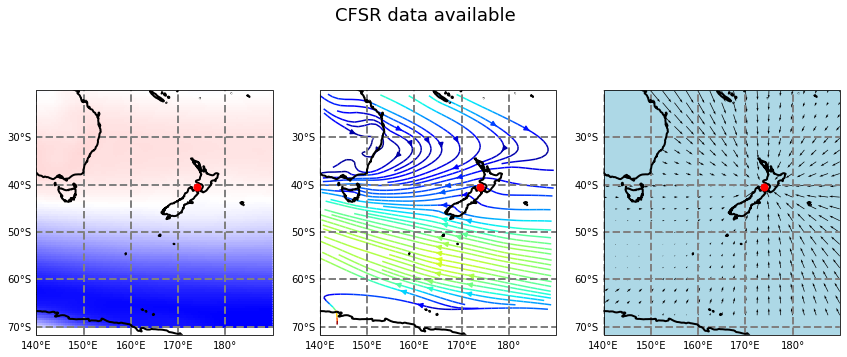


 loading the Moana v2 hindcast data... 



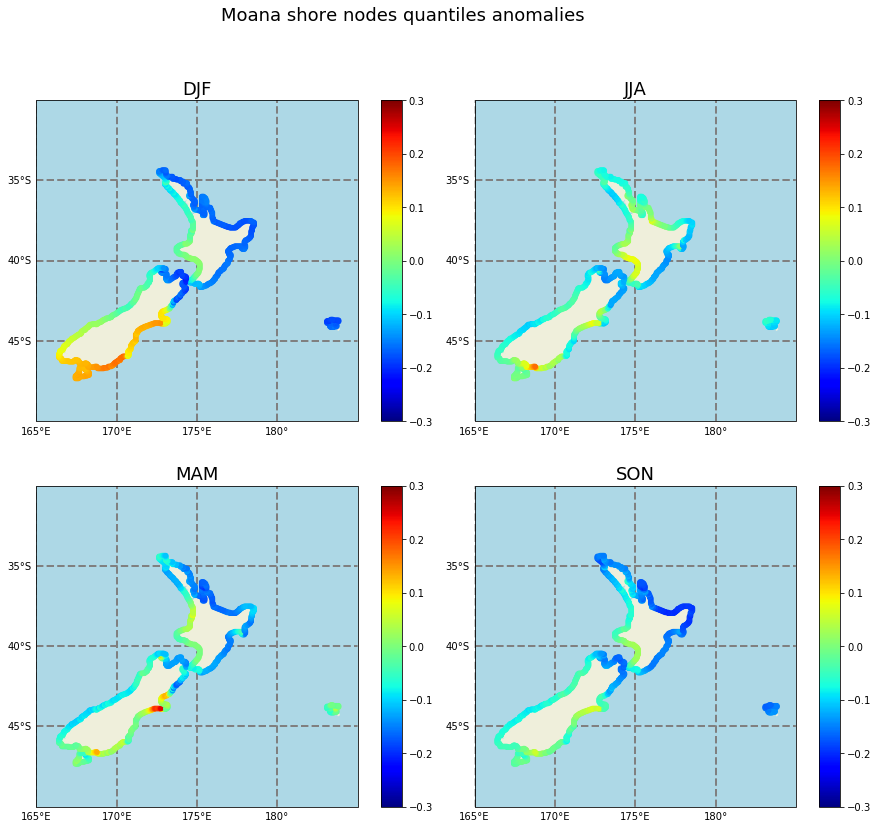


 loading and plotting the UHSLC tidal guages... 



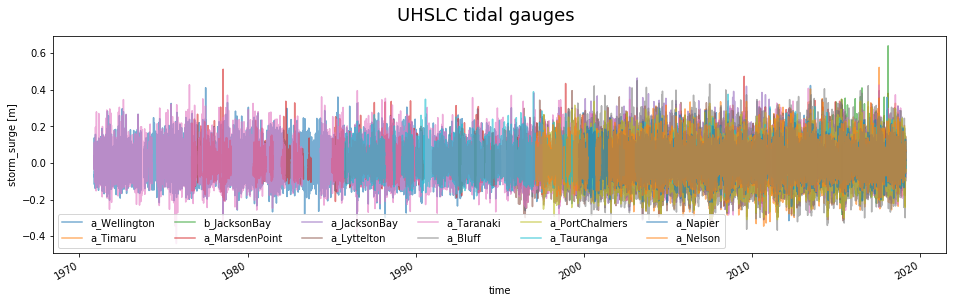

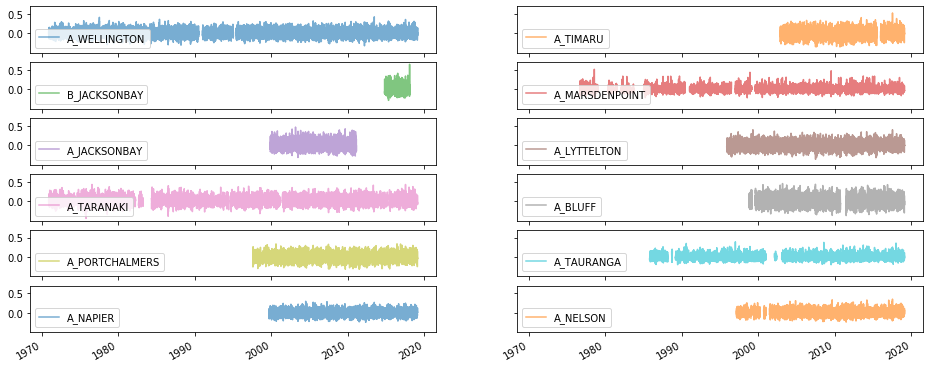

In [2]:
# load the data
load_cfsr_moana_uhslc = Loader(
    data_to_load=['cfsr','moana','uhslc']
)

In [3]:
load_cfsr_moana_uhslc.location

(173.9, -40.5)

## Regional PCs


 plotting 2 components with 2 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



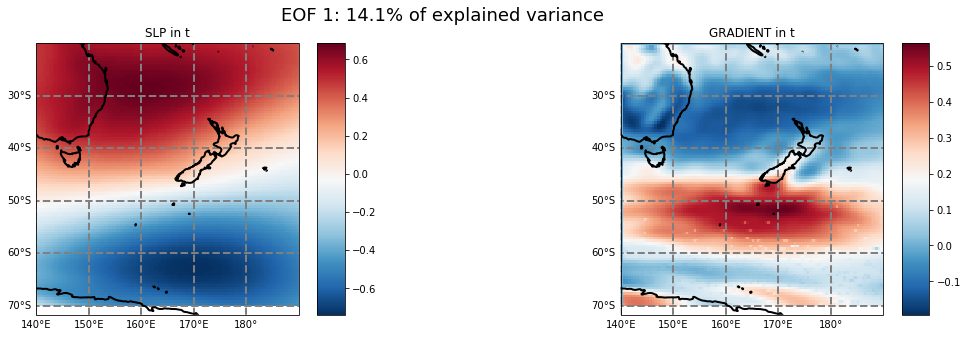

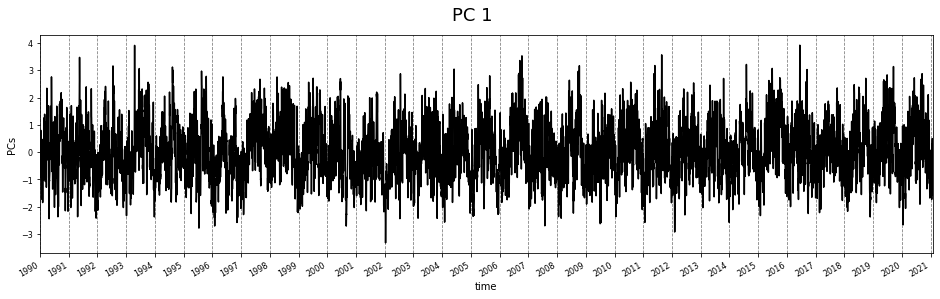

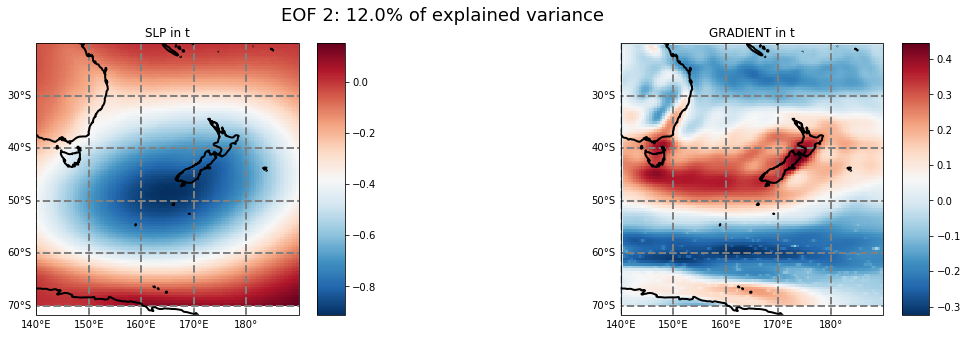

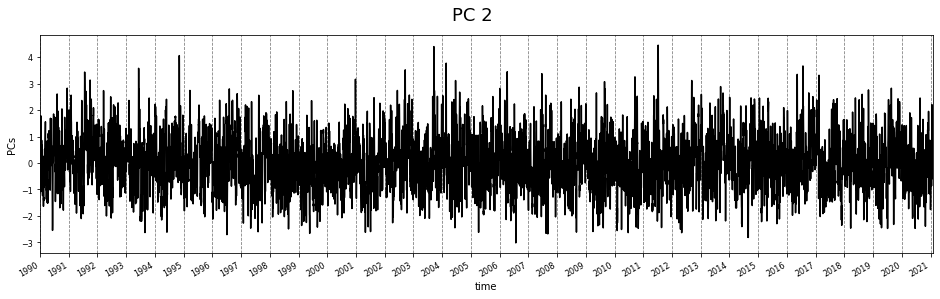

In [4]:
# load / calculate the regional pcs
if os.path.isfile('../data/cfsr/cfsr_regional_daily_pcs.nc'):
    import xarray as xr
    pcs_cfsr = xr.open_dataset(
        '../data/cfsr/cfsr_regional_daily_pcs.nc'
    )
    from sscode.plotting.pca import plot_pcs
    plot_pcs(pcs_cfsr,n_plot=2)

## Local PCs (with gradient)


 lets calculate the PCs... 


 calculating the gradient of the sea-level-pressure fields... 


 pressure/gradient predictor both with shape: 
 (11354, 25, 25) 


 calculated PCs matrix with shape: 
 (11353, 1250) 


 plotting 2 components with 2 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



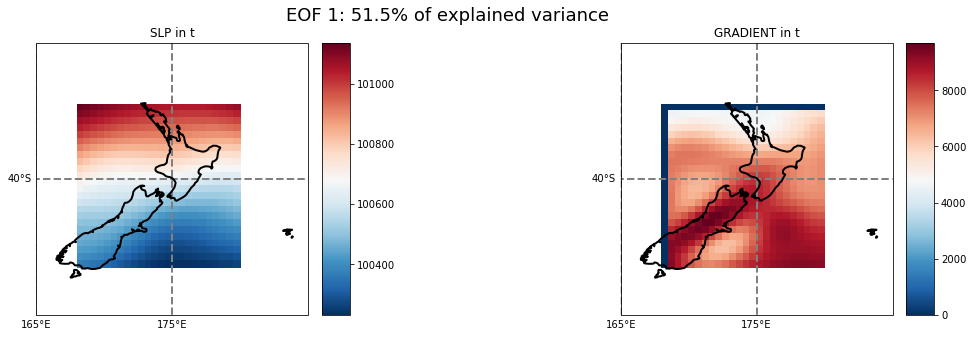

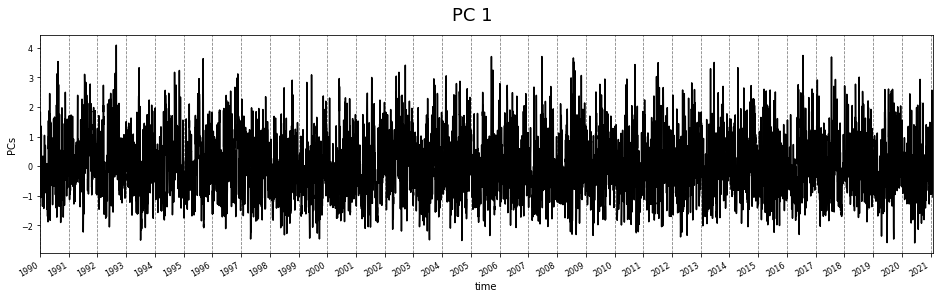

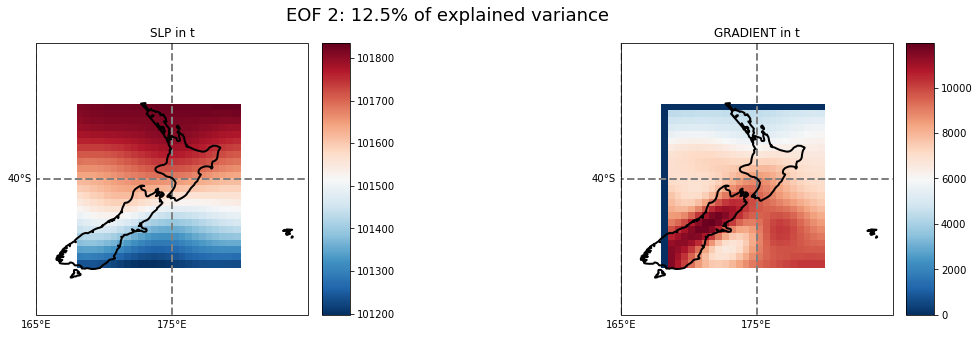

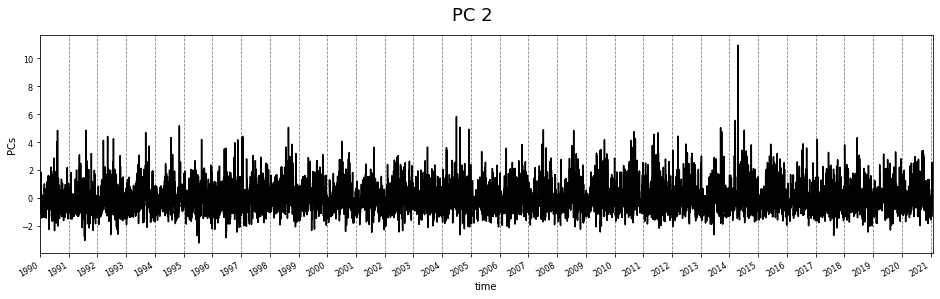

In [5]:
# calculate some local pcs
pcs_data, pcs_scaler = PCA_DynamicPred(
    load_cfsr_moana_uhslc.predictor_slp, 
    calculate_gradient=True, time_lapse=1,
    region=(True,(
        load_cfsr_moana_uhslc.location[0]-6.1,
        load_cfsr_moana_uhslc.location[0]+6.1,
        load_cfsr_moana_uhslc.location[1]+6.1,
        load_cfsr_moana_uhslc.location[1]-6.1
    )),
    pca_plot=(True,True) # (plot,scale)
)
if False:
    from sscode.plotting.pca import plot_recon_pcs
    recon_slp = plot_recon_pcs(
        pcs_data, pcs_scaler,
        region=default_region_reduced,
        return_slp=True
    )

In [6]:
pcs_data

<xarray.Dataset>
Dimensions:   (n_components: 1250, n_features: 1250, n_lat: 25, n_lon: 25, time: 11353)
Coordinates:
  * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2021-01-30
Dimensions without coordinates: n_components, n_features, n_lat, n_lon
Data variables:
    PCs       (time, n_components) float64 -11.78 -13.53 ... 4.215e-21 4.221e-22
    EOFs      (n_components, n_features) float64 -0.0299 -0.03045 ... 0.0 0.0
    variance  (n_components) float64 594.7 144.0 105.9 ... 4.51e-41 5.936e-42
    pcs_lon   (n_lon) float32 168.0 168.5 169.0 169.5 ... 179.0 179.5 180.0
    pcs_lat   (n_lat) float32 -34.5 -35.0 -35.5 -36.0 ... -45.5 -46.0 -46.5

## Local PCs (with wind)


 lets calculate the PCs... 


 adding the wind to the predictor... 


 winds predictor with shape: 
 (11354, 11, 11) 


 calculated PCs matrix with shape: 
 (11353, 242) 


 plotting 2 components with 2 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



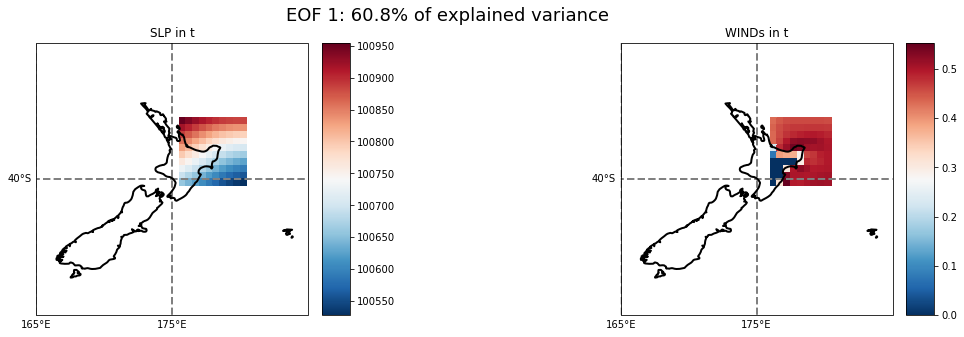

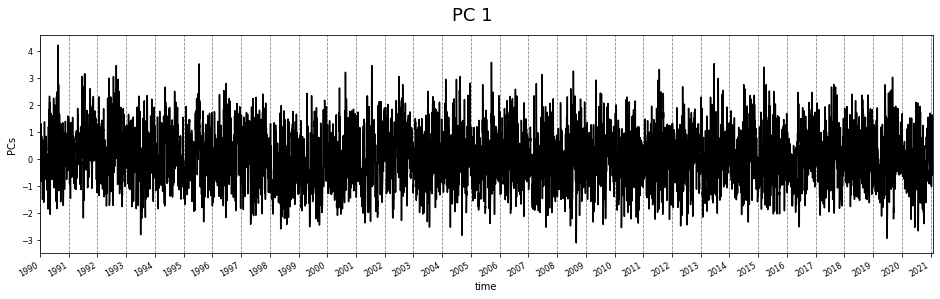

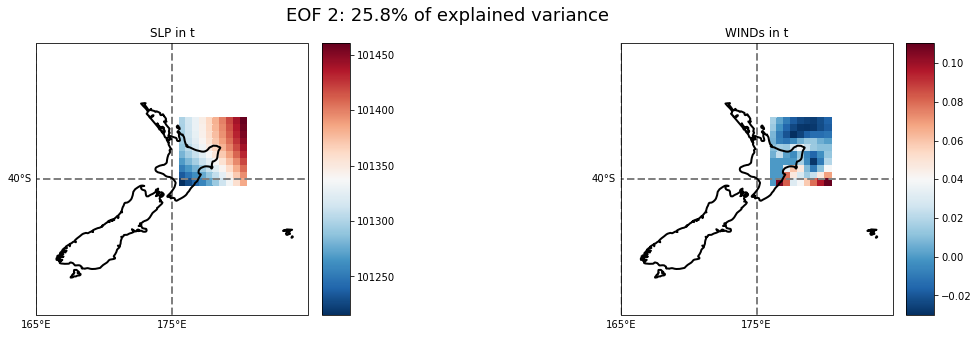

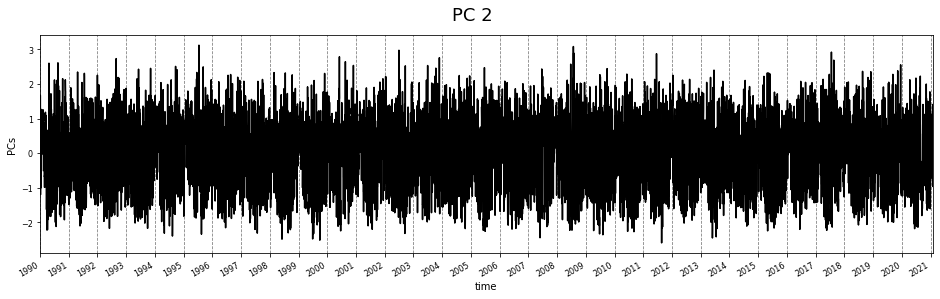

(<xarray.Dataset>
 Dimensions:   (n_components: 242, n_features: 242, n_lat: 11, n_lon: 11, time: 11353)
 Coordinates:
   * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2021-01-30
 Dimensions without coordinates: n_components, n_features, n_lat, n_lon
 Data variables:
     PCs       (time, n_components) float64 -5.347 7.058 ... -1.866e-20 -1.34e-22
     EOFs      (n_components, n_features) float64 -0.07948 -0.08062 ... -0.0 -0.0
     variance  (n_components) float64 122.8 52.17 9.518 ... 6.591e-37 1.023e-41
     pcs_lon   (n_lon) float32 175.5 176.0 176.5 177.0 ... 179.5 180.0 180.5
     pcs_lat   (n_lat) float32 -35.5 -36.0 -36.5 -37.0 ... -39.5 -40.0 -40.5,
 StandardScaler())

In [8]:
# more pcs in new location
new_location = (178,-38)
PCA_DynamicPred(
    load_cfsr_moana_uhslc.predictor_slp, 
    calculate_gradient=False, time_lapse=1,
    region=(True,(
        new_location[0]-2.6,new_location[0]+2.6,
        new_location[1]+2.6,new_location[1]-2.6
    )),
    winds=(True,load_cfsr_moana_uhslc.predictor_wind),
    wind_vars=('wind_proj_mask','lon','lat'),
    pca_plot=(True,True),
    pca_ttls=['SLP in t', 'WINDs in t']
)